In [58]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_squared_log_error,mean_absolute_percentage_error,mean_absolute_error,r2_score

from catboost import CatBoostRegressor

from lightgbm import LGBMRegressor
pd.set_option('display.max_columns', None)

In [59]:
!pip install catboost
!pip install lightgbm

In [60]:
train_data= pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv')
sample_data= pd.read_csv('sample_submission.csv')

In [61]:
train_data.head(2)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0


In [62]:
train_data.shape

(1200000, 21)

In [63]:
test_data.head(2)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment


In [64]:
test_data.shape

(800000, 20)

In [65]:
sample_data.head(2)

,id,Premium Amount
0,1200000,1102.545
1,1200001,1102.545


In [66]:
sample_data.shape

(800000, 2)

## Check the datatypes 

In [68]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [69]:
# Missing values 
((train_data.isnull().sum()/train_data.shape[0])*100).sort_values(ascending= False)

Previous Claims         30.335750
Occupation              29.839583
Credit Score            11.490167
Number of Dependents     9.139333
Customer Feedback        6.485333
Health Score             6.173000
Annual Income            3.745750
Age                      1.558750
Marital Status           1.544083
Vehicle Age              0.000500
Insurance Duration       0.000083
id                       0.000000
Property Type            0.000000
Exercise Frequency       0.000000
Smoking Status           0.000000
Policy Type              0.000000
Policy Start Date        0.000000
Location                 0.000000
Education Level          0.000000
Gender                   0.000000
Premium Amount           0.000000
dtype: float64

## Data cleaning

In [71]:
# We can get rid of the id column 
train_data.drop(columns= 'id', inplace= True)
test_data.drop(columns= 'id', inplace= True)

In [72]:
train_data.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [73]:
# We take the year and month from the policy start date and then drop the column 
train_data['Policy_start_year']= pd.to_datetime(train_data['Policy Start Date']).dt.year
train_data['Policy_start_month']= pd.to_datetime(train_data['Policy Start Date']).dt.month

In [74]:
test_data['Policy_start_year']= pd.to_datetime(test_data['Policy Start Date']).dt.year
test_data['Policy_start_month']= pd.to_datetime(test_data['Policy Start Date']).dt.month

In [75]:
train_data.drop(columns= 'Policy Start Date', inplace= True)
test_data.drop(columns= 'Policy Start Date', inplace= True)

## Missing value treatment 

In [77]:
from sklearn.impute import SimpleImputer, KNNImputer

In [78]:
si= SimpleImputer(strategy= 'median')

In [79]:
train_data.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type',
       'Premium Amount', 'Policy_start_year', 'Policy_start_month'],
      dtype='object')

In [80]:
num_cols= ['Age', 'Annual Income', 'Health Score', 'Credit Score', 'Vehicle Age']

In [81]:
train_data[num_cols]= si.fit_transform(train_data[num_cols])

In [82]:
test_data[num_cols]= si.transform(test_data[num_cols])

In [83]:
test_data[num_cols].isnull().sum()

Age              0
Annual Income    0
Health Score     0
Credit Score     0
Vehicle Age      0
dtype: int64

In [84]:
train_data[num_cols].isnull().sum()

Age              0
Annual Income    0
Health Score     0
Credit Score     0
Vehicle Age      0
dtype: int64

In [85]:
((train_data.isnull().sum()/train_data.shape[0])*100).sort_values(ascending= False)

Previous Claims         30.335750
Occupation              29.839583
Number of Dependents     9.139333
Customer Feedback        6.485333
Marital Status           1.544083
Insurance Duration       0.000083
Credit Score             0.000000
Policy_start_year        0.000000
Premium Amount           0.000000
Property Type            0.000000
Exercise Frequency       0.000000
Smoking Status           0.000000
Age                      0.000000
Vehicle Age              0.000000
Gender                   0.000000
Policy Type              0.000000
Location                 0.000000
Health Score             0.000000
Education Level          0.000000
Annual Income            0.000000
Policy_start_month       0.000000
dtype: float64

In [86]:
# We first need to encode these columns

In [87]:
# KNN imputer for categorical columns 
ki= KNNImputer(n_neighbors= 7, weights= 'distance')

In [88]:
cat_cols= ['Previous Claims', 'Number of Dependents',  'Insurance Duration']

In [89]:
train_data['Insurance Duration']= ki.fit_transform(train_data[['Insurance Duration']])
test_data['Insurance Duration']= ki.fit_transform(test_data[['Insurance Duration']])

In [90]:
# No. of missing in train
((train_data.isnull().sum()/train_data.shape[0])*100).sort_values(ascending= False)

Previous Claims         30.335750
Occupation              29.839583
Number of Dependents     9.139333
Customer Feedback        6.485333
Marital Status           1.544083
Credit Score             0.000000
Policy_start_year        0.000000
Premium Amount           0.000000
Property Type            0.000000
Exercise Frequency       0.000000
Smoking Status           0.000000
Insurance Duration       0.000000
Age                      0.000000
Vehicle Age              0.000000
Gender                   0.000000
Policy Type              0.000000
Location                 0.000000
Health Score             0.000000
Education Level          0.000000
Annual Income            0.000000
Policy_start_month       0.000000
dtype: float64

In [91]:
# No.of missing in test 
((test_data.isnull().sum()/test_data.shape[0])*100).sort_values(ascending= False)

Previous Claims         30.350250
Occupation              29.890625
Number of Dependents     9.141250
Customer Feedback        6.534500
Marital Status           1.542000
Credit Score             0.000000
Policy_start_year        0.000000
Property Type            0.000000
Exercise Frequency       0.000000
Smoking Status           0.000000
Insurance Duration       0.000000
Age                      0.000000
Vehicle Age              0.000000
Gender                   0.000000
Policy Type              0.000000
Location                 0.000000
Health Score             0.000000
Education Level          0.000000
Annual Income            0.000000
Policy_start_month       0.000000
dtype: float64

In [92]:
si_cat= SimpleImputer(strategy='most_frequent')

In [93]:
cat_cols= ['Number of Dependents', 'Customer Feedback', 'Marital Status', 'Previous Claims', 'Occupation']

In [94]:
train_data[cat_cols]= si_cat.fit_transform(train_data[cat_cols])
test_data[cat_cols]= si_cat.transform(test_data[cat_cols])

In [95]:
((train_data.isnull().sum()/train_data.shape[0])*100).sort_values(ascending= False)

Age                     0.0
Vehicle Age             0.0
Policy_start_year       0.0
Premium Amount          0.0
Property Type           0.0
Exercise Frequency      0.0
Smoking Status          0.0
Customer Feedback       0.0
Insurance Duration      0.0
Credit Score            0.0
Previous Claims         0.0
Gender                  0.0
Policy Type             0.0
Location                0.0
Health Score            0.0
Occupation              0.0
Education Level         0.0
Number of Dependents    0.0
Marital Status          0.0
Annual Income           0.0
Policy_start_month      0.0
dtype: float64

In [96]:
((test_data.isnull().sum()/test_data.shape[0])*100).sort_values(ascending= False)

Age                     0.0
Gender                  0.0
Policy_start_year       0.0
Property Type           0.0
Exercise Frequency      0.0
Smoking Status          0.0
Customer Feedback       0.0
Insurance Duration      0.0
Credit Score            0.0
Vehicle Age             0.0
Previous Claims         0.0
Policy Type             0.0
Location                0.0
Health Score            0.0
Occupation              0.0
Education Level         0.0
Number of Dependents    0.0
Marital Status          0.0
Annual Income           0.0
Policy_start_month      0.0
dtype: float64

### There are no more missing values left in both train and test 

## Encoding

In [99]:
train_data['Number of Dependents']= train_data['Number of Dependents'].astype(float)
test_data['Number of Dependents']= test_data['Number of Dependents'].astype(float)

In [100]:
train_data['Previous Claims']= train_data['Previous Claims'].astype(float)
test_data['Previous Claims']= test_data['Previous Claims'].astype(float)

In [101]:
edu_dict= {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3}
occ_dict= {'Unemployed': 0, 'Self-Employed': 2, 'Employed': 1}
loc_dict= {'Rural': 0, 'Suburban': 1, 'Urban': 2}
policy_dict= {'Basic': 0, 'Comprehensive':1, 'Premium': 2}
feed_dict= {'Poor': 0, 'Average': 1, 'Good': 2}
exer_dict= {'Rarely': 0, 'Monthly': 1,'Weekly':2, 'Daily': 3}

In [102]:
train_data['Location'].value_counts()

Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64

In [103]:
train_data['Education Level']= train_data['Education Level'].map(edu_dict)
train_data['Occupation']= train_data['Occupation'].map(occ_dict)
train_data['Location']= train_data['Location'].map(loc_dict)
train_data['Policy Type']= train_data['Policy Type'].map(policy_dict)
train_data['Customer Feedback']= train_data['Customer Feedback'].map(feed_dict)
train_data['Exercise Frequency']= train_data['Exercise Frequency'].map(exer_dict)


In [104]:
test_data['Education Level']= test_data['Education Level'].map(edu_dict)
test_data['Occupation']= test_data['Occupation'].map(occ_dict)
test_data['Location']= test_data['Location'].map(loc_dict)
test_data['Policy Type']= test_data['Policy Type'].map(policy_dict)
test_data['Customer Feedback']= test_data['Customer Feedback'].map(feed_dict)
test_data['Exercise Frequency']= test_data['Exercise Frequency'].map(exer_dict)

In [105]:
# N-1 dummy encoding for the rest 
train_data= pd.get_dummies(train_data, dtype= int, drop_first= True)
test_data= pd.get_dummies(test_data, dtype= int, drop_first= True)

In [106]:
train_data.isnull().sum()

Age                       0
Annual Income             0
Number of Dependents      0
Education Level           0
Occupation                0
Health Score              0
Location                  0
Policy Type               0
Previous Claims           0
Vehicle Age               0
Credit Score              0
Insurance Duration        0
Customer Feedback         0
Exercise Frequency        0
Premium Amount            0
Policy_start_year         0
Policy_start_month        0
Gender_Male               0
Marital Status_Married    0
Marital Status_Single     0
Smoking Status_Yes        0
Property Type_Condo       0
Property Type_House       0
dtype: int64

## Feature transforamtion

In [114]:
num_cols =['Age','Annual Income','Health Score ','Credit Score']

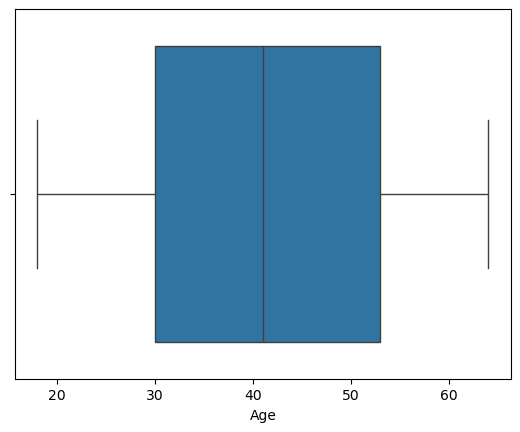

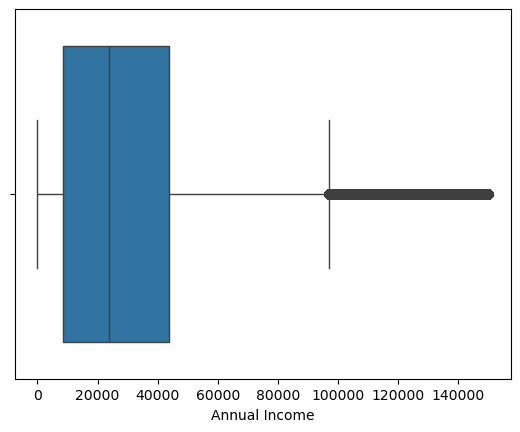

ValueError: Could not interpret value `Health Score ` for `x`. An entry with this name does not appear in `data`.

In [116]:
for i in num_cols:
    sns.boxplot(data=train_data,x=i)
    plt.show()

## Modelling

In [143]:
y = train_data['Premium Amount']
x = train_data.drop(columns = 'Premium Amount')

In [126]:
x_train,x_val,y_train,y_val = train_test_split(x,y,train_size=1100000,random_state=2)

In [128]:
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((1100000, 22), (100000, 22), (1100000,), (100000,))

In [131]:
def model_validation(model, xtrain, ytrain, xtest, ytest):
    m = model
    m.fit(xtrain, ytrain)
    pred = m.predict(xtest)
    print('R2:', r2_score(ytest, pred))
    print('MSE:', mean_absolute_error(ytest, pred))
    print('RMSE:', (mean_squared_log_error(ytest, pred)) ** 0.5)
    print('MSLE:', mean_squared_log_error(ytest, pred))
    print('RMSLE:', (mean_squared_log_error(ytest,pred))**0.5)



In [133]:
model_validation(DecisionTreeRegressor(max_depth=5),x_train,y_train,x_val,y_val)

R2: 0.027316677810406476
MSE: 652.739795831442
RMSE: 1.157534225344876
MSLE: 1.3398854828447622
RMSLE: 1.157534225344876


In [134]:
model_validation(RandomForestRegressor(n_estimators=150,max_depth=7),x_train,y_train,x_val,y_val)

R2: 0.04147521845901181
MSE: 643.5569277922064
RMSE: 1.1462884700600398
MSLE: 1.313977256592587
RMSLE: 1.1462884700600398


In [135]:
model_validation(XGBRFRegressor(n_estimators =150,gamma=2),x_train,y_train,x_val,y_val)

R2: 0.035929105410292594
MSE: 649.0367521044922
RMSE: 1.1525910256008065
MSLE: 1.3284660722955188
RMSLE: 1.1525910256008065


In [136]:
from lightgbm import LGBMRegressor


In [137]:
model_validation(LGBMRegressor(n_estimators=250,min_child_weight=1,learning_rate=0.01),x_train,y_train,x_val,y_val)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 1100000, number of used features: 22
[LightGBM] [Info] Start training from score 1102.518111
R2: 0.04861175703665577
MSE: 642.2998623995726
RMSE: 1.1431276877292245
MSLE: 1.3067409104531633
RMSLE: 1.1431276877292245


## Submissions

In [145]:
final_model = LGBMRegressor(n_estimators=270,min_child_weight=0.1,learning_rate=0.01)

In [147]:
final_model.fit(x,y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 903
[LightGBM] [Info] Number of data points in the train set: 1200000, number of used features: 22
[LightGBM] [Info] Start training from score 1102.544822


LGBMRegressor(learning_rate=0.01, min_child_weight=0.1, n_estimators=270)

In [153]:
final_model.score(x,y)

0.04833206447560101

In [159]:
pred = final_model.predict(test_data)

In [163]:
pred

array([1383.74326359, 1118.47471426, 1078.47834605, ..., 1099.41510937,
       1139.14185381, 1064.80085643])

In [171]:
sample_data['Premium Amount']== pred

0         False
1         False
2         False
3         False
4         False
          ...  
799995    False
799996    False
799997    False
799998    False
799999    False
Name: Premium Amount, Length: 800000, dtype: bool

In [175]:
sample_data.to_csv('submission1.csv',index= False)